In [52]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import load_model

# En este documento se predecirán nuevas gráficas con valores de fracción volumen, radio y espesor de la partícula nuevos

Carga del modelo normalizado

In [53]:
model = tf.keras.models.load_model('normalizado3.h5')

# Especificando los valores a usar

In [54]:
fracvol = 1
radio = 60
espesor = 300
longitud_de_onda = list(range(301, 901))

Creando diccionario

In [55]:
data = {
    "Longitud de onda": longitud_de_onda,
    "Fracvol": [fracvol] * len(longitud_de_onda),
    "Radio (nm)": [radio] * len(longitud_de_onda),
    "Espesor de la película (nm)": [espesor] * len(longitud_de_onda)
}

Creando DF

In [56]:
df  = pd.DataFrame(data)
df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,1,60,300
1,302,1,60,300
2,303,1,60,300
3,304,1,60,300
4,305,1,60,300
...,...,...,...,...
595,896,1,60,300
596,897,1,60,300
597,898,1,60,300
598,899,1,60,300


Normalizando valores

In [57]:
scaler = MinMaxScaler()
x = df.values
x_norm = scaler.fit_transform(x)

# Predicciones

In [58]:
predictions = model.predict(x_norm)

19/19 [==============================] - 0s 551us/step


In [59]:
df1 = pd.DataFrame(df, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

In [60]:
result_df = pd.concat([df1, df2], axis=1)
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301,1,60,300,0.952235
1,302,1,60,300,0.936241
2,303,1,60,300,0.920248
3,304,1,60,300,0.904253
4,305,1,60,300,0.888260
...,...,...,...,...,...
595,896,1,60,300,0.122638
596,897,1,60,300,0.122792
597,898,1,60,300,0.122945
598,899,1,60,300,0.123098


# Gráfica con valores normalizados

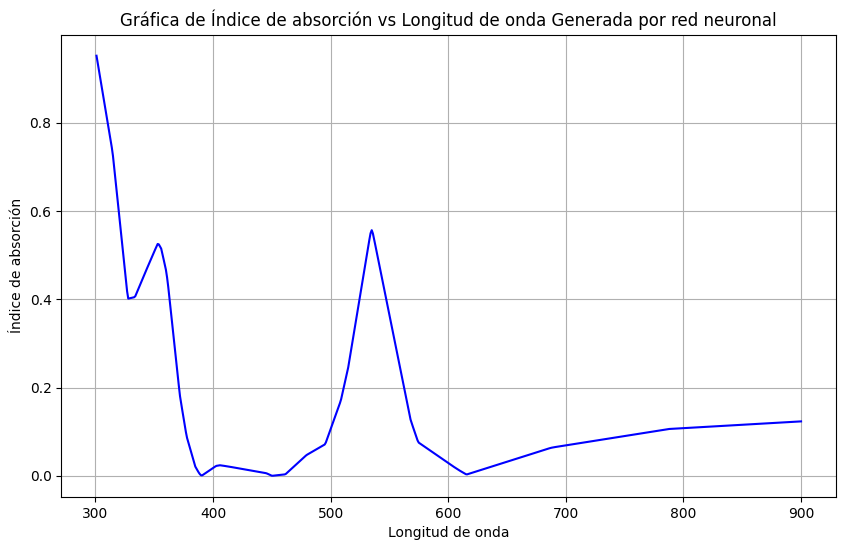

In [61]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

Para desnormalizar sacaremos la media y desviacion estandar de los datos con los que la red fue entrenada

In [62]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

In [63]:
minimo = param['Índice de absorción'].min()
maximo = param['Índice de absorción'].max()

In [64]:
factor = 0.5

In [65]:
result_df['Índice de absorción'] = (result_df['Índice de absorción'] * (maximo - minimo)*factor) + minimo
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301,1,60,300,0.065775
1,302,1,60,300,0.064671
2,303,1,60,300,0.063566
3,304,1,60,300,0.062461
4,305,1,60,300,0.061356
...,...,...,...,...,...
595,896,1,60,300,0.008471
596,897,1,60,300,0.008482
597,898,1,60,300,0.008492
598,899,1,60,300,0.008503


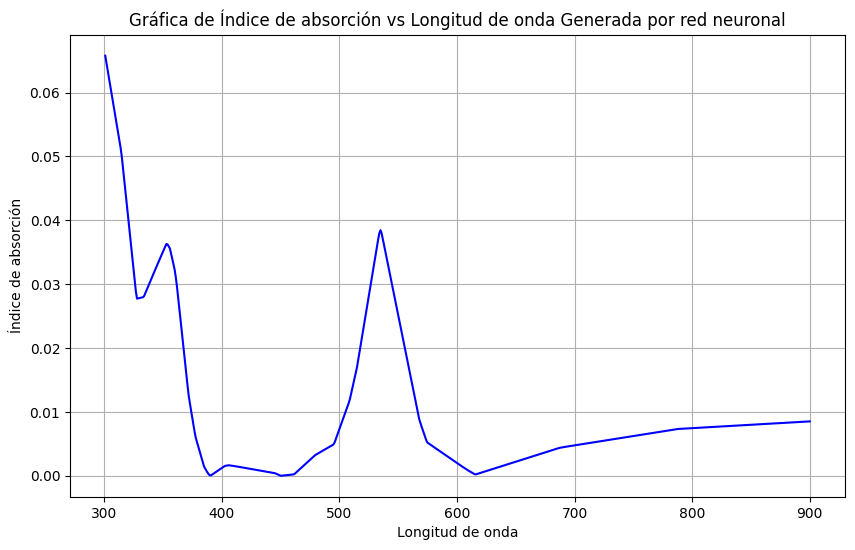

In [66]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

# Comprobando si son iguales

In [67]:
fracvol = 1
radio = 6
espesor = 100
longitud_de_onda = list(range(301, 901))
data = {
    "Longitud de onda": longitud_de_onda,
    "Fracvol": [fracvol] * len(longitud_de_onda),
    "Radio (nm)": [radio] * len(longitud_de_onda),
    "Espesor de la película (nm)": [espesor] * len(longitud_de_onda)
}
df  = pd.DataFrame(data)

In [68]:
scaler = MinMaxScaler()
x = df.values
x_norm = scaler.fit_transform(x)

In [69]:
df1 = pd.DataFrame(df, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

In [70]:
result_df2 = pd.concat([df1, df2], axis=1)


In [71]:
minimo = param['Índice de absorción'].min()
maximo = param['Índice de absorción'].max()

In [72]:
result_df2['Índice de absorción'] = (result_df2['Índice de absorción'] * (maximo - minimo)*factor) + minimo

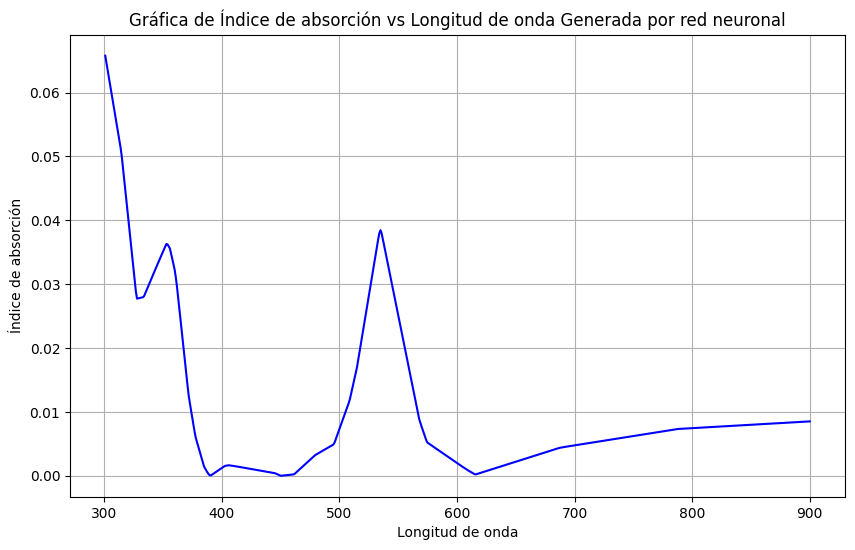

In [73]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df2[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

In [74]:
son_iguales = result_df['Índice de absorción'].equals(result_df2['Índice de absorción'])
if son_iguales:
    print("Las columnas son iguales en ambos DataFrames.")
else:
    print("Las columnas no son iguales en ambos DataFrames.")

Las columnas son iguales en ambos DataFrames.


In [ ]:

import joblib

# Load the scaler
scaler = joblib.load('minmax_scaler.pkl')

# Suppose 'new_data' is your new unscaled data
new_data_normalized = scaler.transform(new_data)

# Now you can use these normalized data for predictions
predictions = model.predict(new_data_normalized)


In [ ]:

import joblib

# Load the scalers
scaler_X = joblib.load('minmax_scaler_X.pkl')
scaler_y = joblib.load('minmax_scaler_y.pkl')

# Suppose 'new_data' is your new unscaled data
new_data_normalized = scaler_X.transform(new_data)

# Now you can use these normalized data for predictions
predictions = model.predict(new_data_normalized)
